In [57]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [58]:
df= pd.read_csv("archive (5)\Housing.csv")

<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\micha\AppData\Local\Temp\ipykernel_14424\1634281433.py:1: SyntaxWarning: invalid escape sequence '\H'
  df= pd.read_csv("archive (5)\Housing.csv")


In [59]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [60]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [61]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [63]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [64]:
df.shape

(545, 13)

### I. Handling Missing Data
Problem: Incomplete observations skew results.

Solutions:

* Deletion: Remove rows/columns with missing values.
* Use when: Missing data is random and <5% of dataset.
* Imputation: Fill missing values.
* Numerical: Mean/median
* Categorical: Mode (most frequent value)

In [65]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

handling missing data is not needed since there is no missing data

### II. Categorical Data Encoding
Problem: ML algorithms require numerical input.

Solutions:

* Label Encoding: Assign integers to categories.

    * Example: "Red"→0, "Blue"→1

Use for: Ordinal data (e.g., "Low" < "Medium" < "High").

* One-Hot Encoding:Create binary columns per category.

    * Example: "Color_Red"=[1,0], "Color_Blue"=[0,1]

Use for: Nominal data (no order).
         encoding features, not the target

Given that the categorical variables in this dataset are nominal (no inherent order), One-Hot Encoding is generally the preferred method. It prevents the model from assuming any ordinal relationship between categories, which aligns with the nature of the data.

In [66]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus','prefarea']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(df_encoded.head())


      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  prefarea_yes  
0                

### III. Outlier Detection
Problem: Extreme values distort statistics. Solutions:

#### 1.IQR Method:

* Q1: 25th percentile → "Middle" of the first half.

* Q2: 50th percentile → Median of the full dataset.

* Q3: 75th percentile → "Middle" of the second half.

$$ IQR = Q3 - Q1 $$
$$ Lower Bound = Q1 - 1.5 * IQR $$ 
$$ Upper Bound = Q3 + 1.5 * IQR $$
IQR = Q3 - Q1: Used for outlier detection (e.g., in boxplots). image.png


#### 2.Z-score: 
* Flag values where 
    $$ z= x−μ / σ $$ 
    * Then, flag outliers where $$ |z| > 3 $$


I choose IQR because it does not assume a normal distribution and is robust to outliers, making it a safer choice for real-world, often skewed data like housing prices.

In [67]:
df_no_outliers = df_encoded.copy()
print("original shape:" , df_encoded.shape)
for col in ['price', 'area']:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_no_outliers[(df_no_outliers[col] < lower) | (df_no_outliers[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower) & (df_no_outliers[col] <= upper)]

print("New shape after outlier removal:", df_no_outliers.shape)


original shape: (545, 14)
price: 15 outliers
area: 13 outliers
New shape after outlier removal: (517, 14)


#### **Iv. Feature Scaling**

**Problem:**

Features on different scales bias models (e.g., age vs. salary).

**Solutions:**

Min-Max Scaling: Rescale to [0, 1].

$$
x' = \frac{x-min(x)}{\text{max}(x)-min(x)}
$$


Standardization (Z-score): Center around mean (μ=0, σ=1).
$$
x' = \frac{x - \mu}{\sigma}
$$

RobustScaler works by scaling your data using the median and the interquartile range (IQR) instead of the mean and standard deviation.


For each value in a column:
$$
X_{scaled} =\frac {X - Midian(X)}{IQR(x)}
$$


 
Where:

Median is the 50th percentile (middle value).

IQR is the difference between the 75th percentile (Q3) and the 25th percentile (Q1):
$$ 
IQR = Q3 - Q1 
$$





In [68]:
from sklearn.preprocessing import StandardScaler

features = df_no_outliers.drop(columns=['price'])  
target = df_no_outliers['price']

numeric_cols = ['area']


scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])



Why Not Min-Max or Z-score?

Min-Max would shrink almost all values too close to 0 due to outliers (e.g., a 100M house).

Z-score would also suffer because the mean and std dev are influenced by outliers.

# **V. Train-Test Split**

**Problem:**
 Avoid overfitting by evaluating on unseen data.

**Solution:**

- Split data into training (70-80%) and testing (20-30%) sets.

- Stratified split preserves class ratios.

In [69]:
X = df_no_outliers.drop(columns=['price'])
y = df_no_outliers['price']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (413, 13)
Test set shape: (104, 13)


# **VI. Dimensionality Reduction (PCA)**
**Problem:**

High dimensions increase complexity.

**Solution:**
Project data onto principal components (eigenvectors of covariance matrix).


### **Principal Component Analysis (PCA) - Formulas**

#### **Step 1: Mean Centering the Data**

Let $X$ be your data matrix with $n$ samples and $p$ features. First, subtract the mean from each feature (mean centering):

$$
X_{\text{centered}} = X - \bar{X}
$$



#### **Step 2: Compute the Covariance Matrix**

$$
\Sigma = \frac{1}{n-1} X_{\text{centered}}^T X_{\text{centered}}
$$

* $\Sigma$: Covariance matrix
* $X_{\text{centered}}$: Mean-centered data



#### **Step 3: Eigen Decomposition**

Solve the eigenvalue problem:

$$
\Sigma v = \lambda v
$$

* $v$: Eigenvectors (principal components)
* $\lambda$: Eigenvalues (explained variance by each component)



#### **Step 4: Select Top $k$ Components**

Choose the top $k$ eigenvectors with the highest eigenvalues and form a matrix $W$:

$$
W = [v_1, v_2, \dots, v_k]
$$



#### **Step 5: Project the Data onto the New Feature Space**

$$
Z = X_{\text{centered}} \cdot W
$$

* $Z$: The transformed data in the principal component space



### **Final Formula**

$$
Z = (X - \bar{X}) \cdot W
$$




applied pca to reduce multicollinearity (highly correlated features) and for training sensitive models (like KNN, SVM) 
if  fewer dimensions is needed

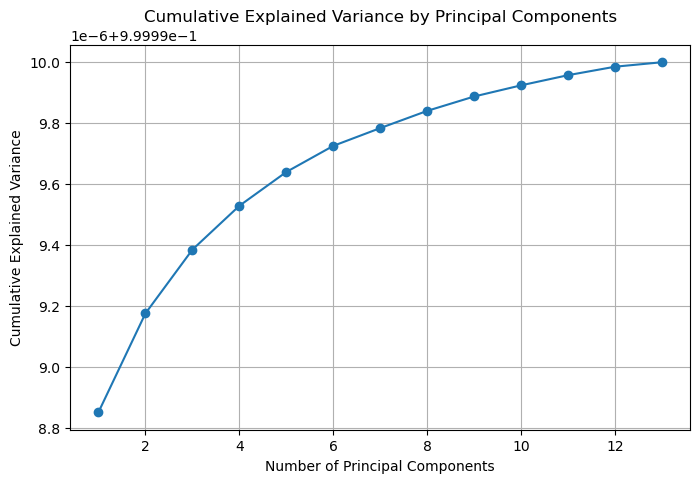

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


pca = PCA()
X_pca = pca.fit_transform(X_train)


cum_var = np.cumsum(pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()


The plot shows that around 6 principal components explain 96% of the variance, which is efficient for dimensionality reduction while retaining most of the data's information.